In [51]:
#차원과 차원 축소
# 특성: 데이터가 가진 속성
# 머신러닝에서는 특성을 '차원'이라고도 부른다.
# 10,000개의 특성(=차원)을 줄일 수 있으면 저장 공간을 크게 절약할 수 있다.

In [52]:
# [ 차원 축소 ]
# - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법.
# - 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)


# 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

#  *** 주성분은 원본 차원과 같고 바꾼 데이터는 차원이 줄어든다!!!
# 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본의 특성을 가장 잘 나타냄


# 첫번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향이 '두번째 주성분'
# 일반적으로 주성분은 원본 측성의 개수 만큼 찾을 수 있다.

In [53]:
#[ PCA 클래스 ]

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-11-11 23:55:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 23:55:39--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 23:55:39--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [54]:
# 사이킷런의 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분서 알고리즘 제공
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정
# k_평균과 마찬가지로 비지도 학습이기에 fit() 메서드에 타깃값을 제공 x

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [55]:
# PCA 클래스가 찾은 주성분은 components_ 속성에 저장
# print로 확인

print(pca.components_.shape)

(50, 10000)


In [56]:
# n_components=50 으로 지정하여서 첫 번째 차원이 50, 두번째 차원은 항상 원본 데이터의 특성 개수와 같음 => 10,000

In [57]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

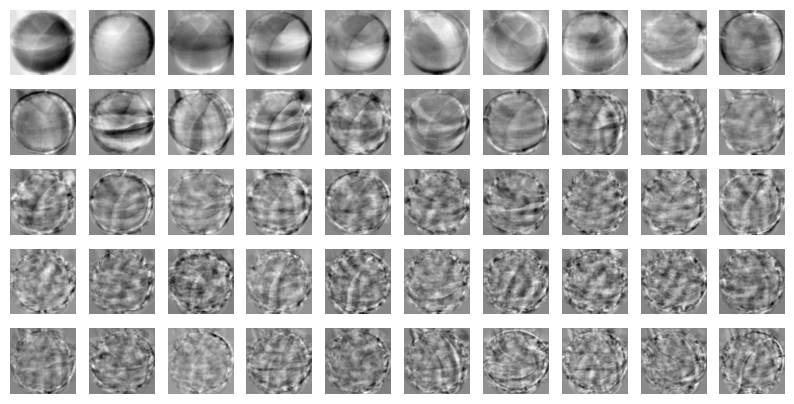

In [58]:
# draw_fruits에 대한 정의 현재 페이지에 되어 있지 않아서 실행이 안 됨
# 6-2에서 사용한 정의하는 명령문 가져와서 위에서 실행

draw_fruits(pca.components_.reshape(-1,100,100))

In [59]:
# 위 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

In [60]:
print(fruits_2d.shape)

(300, 10000)


In [61]:
# PCA의 transform()메서드를 사용해 원본 데이터의 차원을 50으로 줄인다

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [62]:
# [ 원본 데이터 재구성 ]
# # PCA의 클래스 inverse_transform() 메서드를 이용

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


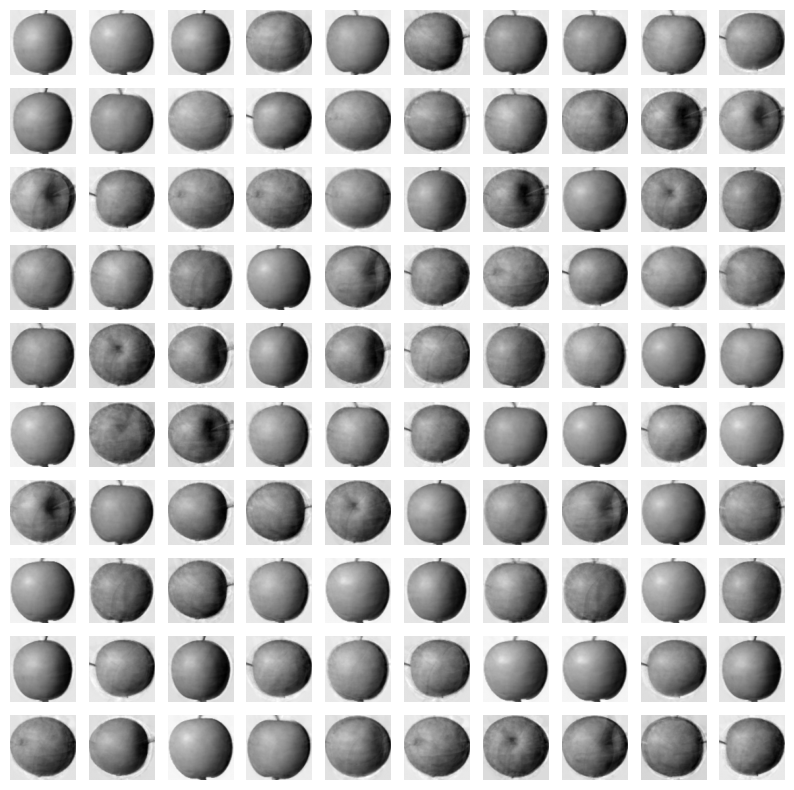

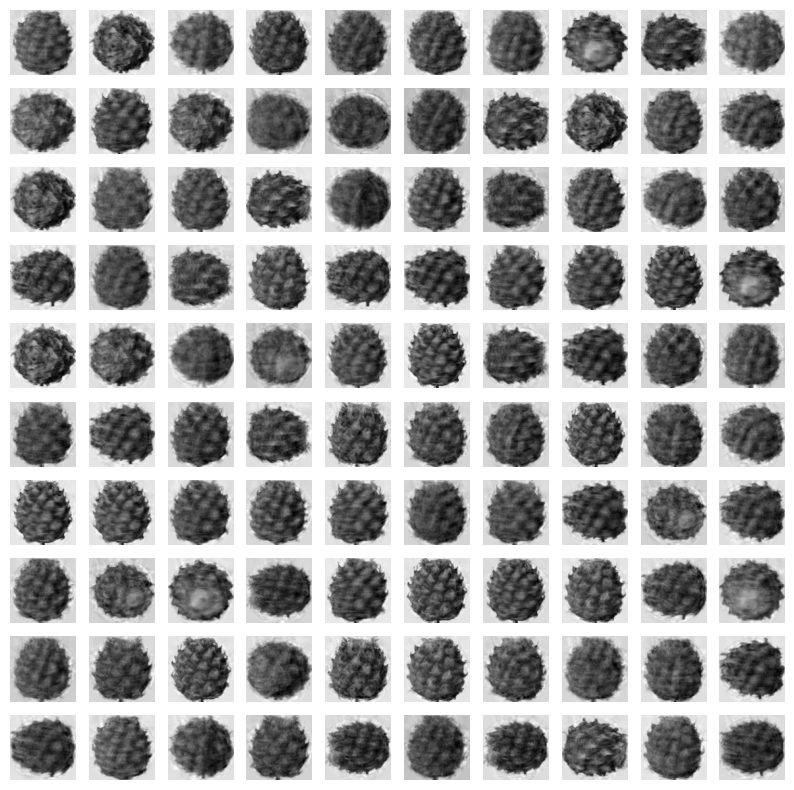

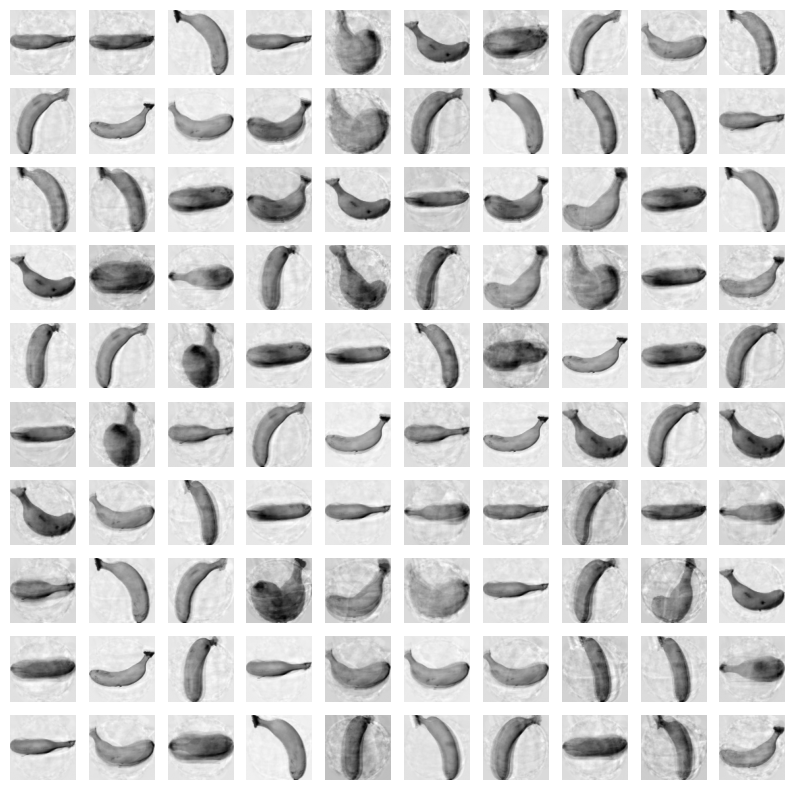

In [63]:
# 100 x 100 크기로 바꾸어 100개씩 나누어 출력

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [64]:
# [ 설명된 분산 ]
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록

print(np.sum(pca.explained_variance_ratio_))

0.9215197871736033


In [ ]:
# 92%가 넘는 분산을 유지
# 설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는 데 도움이 됨

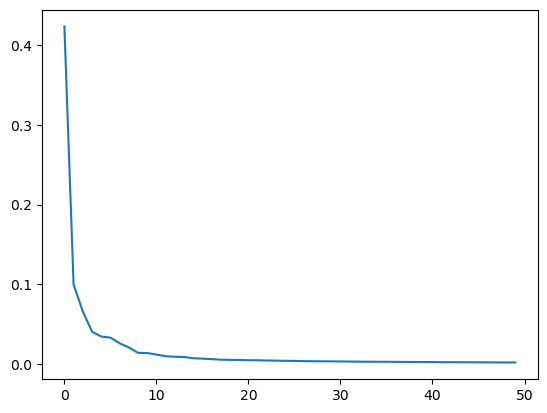

In [65]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# PCA로 차원 축소된 데이터를 사용하여 지도학습 모델을 훈련

# 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 확인

In [66]:
# 사이킷런의 LogisticRegression 모델

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# 지도 학습 모델을 사용하려면 타깃값이 있어야 함
# 여기애서 사과 0, 파인애플 1, 바나나 2

In [67]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [74]:
#원본 데이터인 fruits_2d를 사용

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.08522119522094726


In [75]:
# PCA로 축소한 fruits_pca와 비교

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.006667518615722656


In [ ]:
# 50개의 특성만 사용했는데도 정확도가 같고 시간은 30배 정도 더 빠르다.

In [76]:
# 설명된 분산 50%에 달하는 주성분 찾기

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [78]:
print(pca.n_components_)

2


In [ ]:
# 2개의 특성으로 분산의 50% 표현

In [79]:
#주성분이 2개이므로 데이터 크기(300,2)가 된다

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [80]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.01012248992919922


/home/oracle/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
#차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터 찾기

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


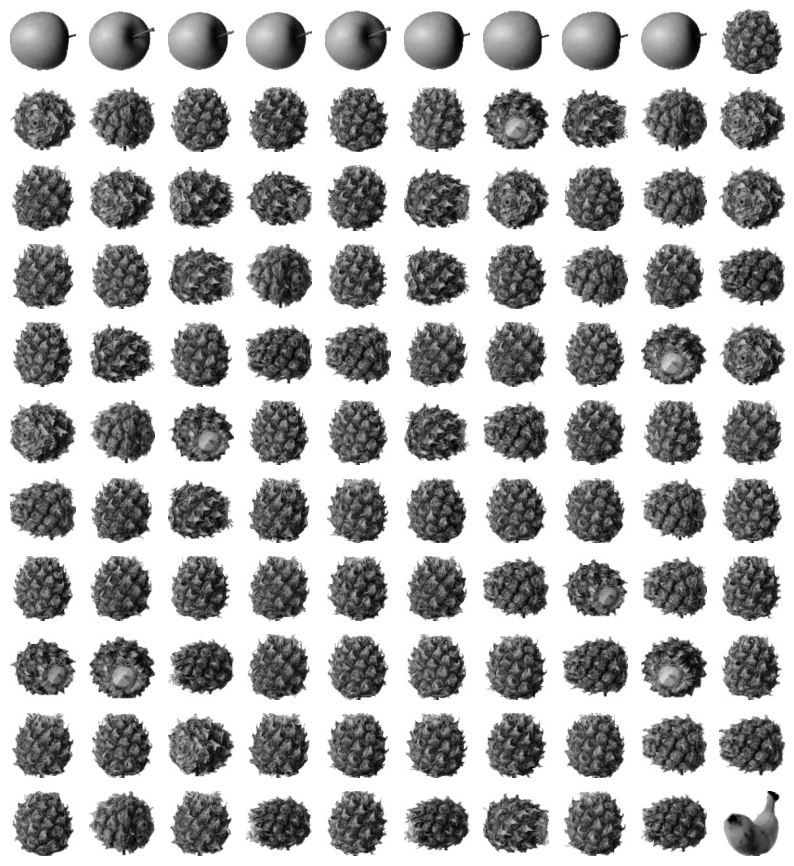

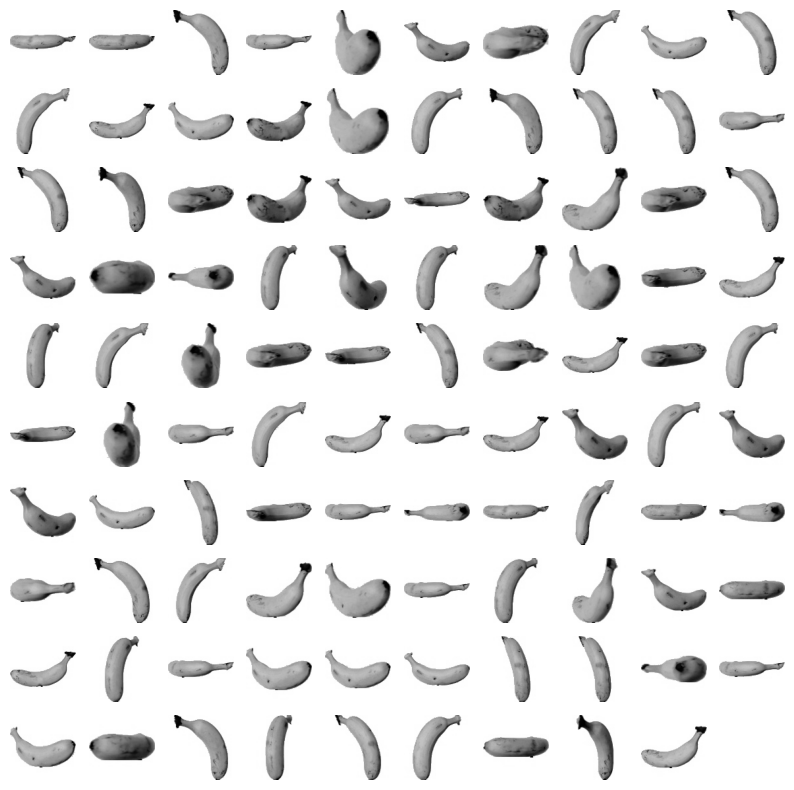

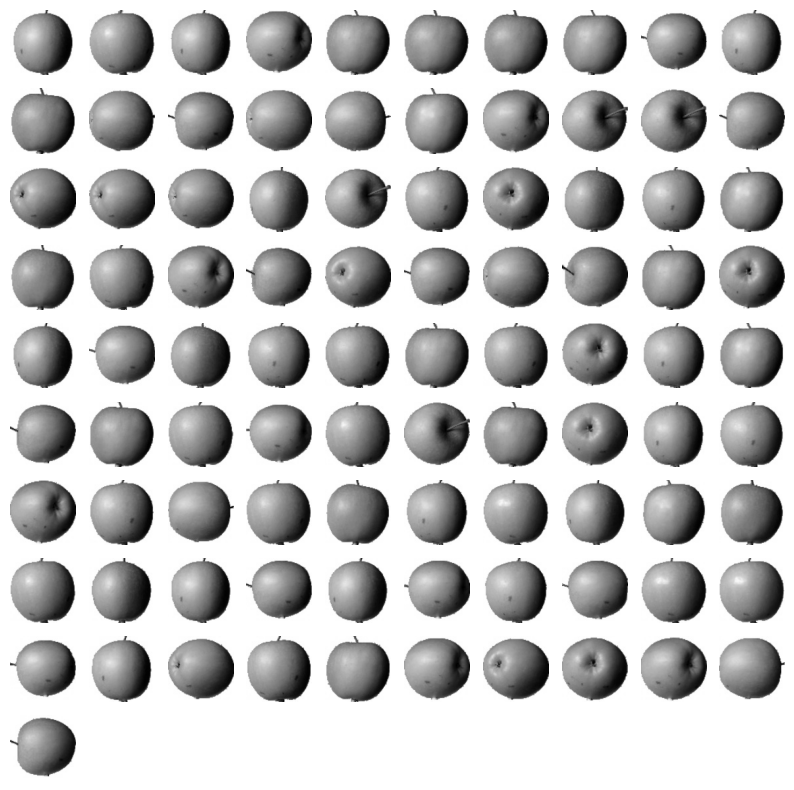

In [82]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

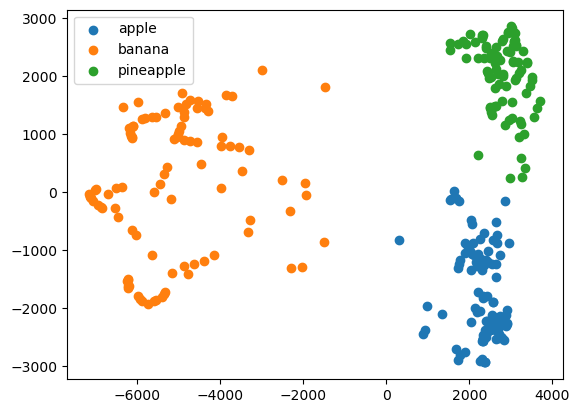

In [85]:
# fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능
# km.labels_ 를 사용해 클러스터별로 나누어 산점도 그리기

for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()